In [115]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

from pprint import pprint

%matplotlib inline

In [40]:
import os

data_path = '/home/void/data/processed_files/'
portable_path = r'D:\data_science\data\\'

files = os.listdir(portable_path)
files = [file for file in files if file.endswith('.pkl')]

In [41]:
dfs = [pd.read_pickle(portable_path + file) for file in files]

In [42]:
df = pd.concat(dfs)

In [43]:
# helper funcs

def convert_price(string):
    return float(string[1:])

def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])
    
def emperical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count

In [ ]:
np.linsp

(array([3.920e+02, 1.114e+03, 2.080e+03, 2.121e+03, 4.566e+03, 2.586e+03,
        2.289e+03, 2.353e+03, 4.754e+03, 2.208e+03, 2.312e+03, 2.361e+03,
        9.740e+03, 3.041e+03, 2.230e+03, 5.220e+02, 5.500e+02, 1.430e+02,
        7.200e+01, 4.800e+01, 1.160e+02, 5.100e+01, 3.800e+01, 3.500e+01,
        3.000e+01, 4.400e+01, 1.300e+01, 2.300e+01, 6.000e+00, 3.500e+01,
        1.200e+01, 6.000e+00, 8.000e+00, 5.000e+00, 2.000e+01, 1.000e+01,
        1.100e+01, 1.000e+01, 0.000e+00, 3.000e+00, 3.000e+00, 5.000e+00,
        8.000e+00, 1.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

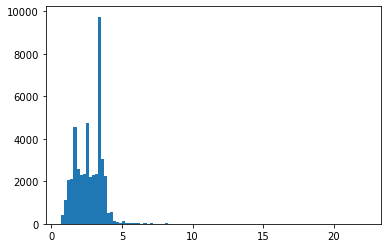

In [142]:
plt.hist(df.tag_count / df.tag_count.std(), bins=100)

In [135]:
df.describe()

,views,likes,review_count,pic_count,price_usd,tag_count,scaled_views
count,46000.000000,46000.000000,46000.00000,46000.000000,46000.000000,46000.000000,46000.000000
mean,624.931022,1.788804,0.11750,9.887565,30.993735,15.504652,0.012728
std,1111.941527,6.916340,0.74735,13.146432,144.819785,5.751102,0.022646
min,0.000000,0.000000,0.00000,0.000000,2.000000,4.000000,0.000000
25%,65.000000,0.000000,0.00000,4.000000,7.000000,11.000000,0.001324
50%,267.000000,0.000000,0.00000,7.000000,14.480000,16.000000,0.005438
75%,753.000000,2.000000,0.00000,12.000000,29.000000,20.000000,0.015336
max,49100.000000,385.000000,56.00000,657.000000,10000.000000,128.000000,1.000000


In [ ]:
plt.loglog(df.tag_count)

In [138]:
np.mean(df.tag_count)

15.504652173913044

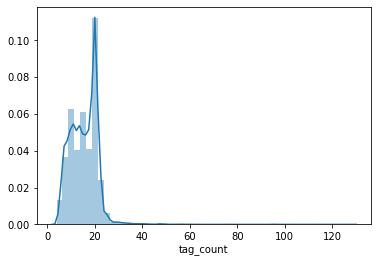

In [137]:
sns.distplot(df.tag_count)

In [136]:
df.head()

,modeler,modeler_response,modeler_ratings,tags,views,likes,review_count,comments,price,pic_count,model_description,model_details,price_usd,tag_count,scaled_views,gt5,gt10
0,Evermotion,"{'percent': 69, 'time': '47.0h'}","{'avg_rating': 4.4, 'num_rating': 369}","[white, sink, basin, bathroom, home, inside, c...",1190,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$12.07,1,Highly detailed model of bathroom sink with al...,"{'model_id': '32979', 'geometry': '- ', 'polyg...",12.07,14,0.024236,True,True
1,DoanNguyen,"{'percent': 42, 'time': '48.0h'}","{'avg_rating': 4.6, 'num_rating': 24}","[bed, bed collection 06, blanket, furnishing, ...",81,3,0,"{'authors': ['ffluza'], 'texts': ['great!'], '...",$7.00,16,Bed collection 06,"{'model_id': '2269193', 'geometry': 'Polygon m...",7.00,12,0.001650,True,True
2,kanhtart,"{'percent': 15, 'time': '48.0h'}","{'avg_rating': 3.3, 'num_rating': 18}","[skyscraper, office, apartment, architectural,...",42,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$80.00,2,High detailed 3d building. Previews were rende...,"{'model_id': '2236791', 'geometry': '- ', 'pol...",80.00,14,0.000855,True,True
3,Panaristi,"{'percent': 94, 'time': '25.5h'}","{'avg_rating': 5.0, 'num_rating': 189}","[army, british, priest, vehicle, military, tan...",3580,1,0,"{'authors': [], 'texts': [], 'datetimes': []}",$119.00,16,M7 Priest - Anzio - A Troop - 22nd Battery - 2...,"{'model_id': '10051', 'geometry': 'Polygon mes...",119.00,18,0.072912,True,True
4,interovisuals,"{'percent': 0, 'time': '48.0h'}","{'avg_rating': 5.0, 'num_rating': 1}","[interior, design, furniture, room, accessory,...",321,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$7.00,1,Model is very well crafted with attention to t...,"{'model_id': '143583', 'geometry': 'Polygon me...",7.00,11,0.006538,True,True


In [49]:
# create new columns
df['price_usd'] = df.price.apply(convert_price)
df['tag_count'] = df.tags.apply(len)

In [54]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df.views.values.reshape(-1, 1)) 
df.loc[:, 'scaled_views'] = scaled_values

In [94]:
df['tag_count'].mean(), df['tag_count'].median()

(15.504652173913044, 16.0)

In [101]:
df['gt5'] = df['tag_count'].apply(lambda x: True if x > 5 else False)

In [97]:
df['gt10'] = df['tag_count'].apply(lambda x: True if x > 10 else False)

In [98]:
df['gt10'].value_counts()

True     35727
False    10273
Name: gt10, dtype: int64

In [125]:
print('GT5\n', df.groupby('gt5')['views'].agg([np.mean, np.std, lambda x: np.std(x)/len(x)]))
print('GT10:\n', df.groupby('gt10')['views'].agg([np.mean, np.std, lambda x: np.std(x)/len(x)]))

GT5
              mean          std  <lambda_0>
gt5                                       
False  516.482143   810.686631    2.065439
True   625.863138  1114.138566    0.024428
GT10:
              mean          std  <lambda_0>
gt10                                      
False  582.287647   934.919482    0.091003
True   637.192767  1157.564594    0.032400


In [131]:
print('GT5\n', df.groupby('gt5')['likes'].agg([np.mean, np.std, lambda x: np.std(x)/len(x)]))
print('GT10:\n', df.groupby('gt10')['likes'].agg([np.mean, np.std, lambda x: np.std(x)/len(x)]))

GT5
            mean       std  <lambda_0>
gt5                                  
False  1.114796  3.002912    0.007651
True   1.794597  6.940149    0.000152
GT10:
            mean       std  <lambda_0>
gt10                                 
False  1.130244  4.246468    0.000413
True   1.978168  7.499708    0.000210


In [104]:
df.groupby('gt10')['views'].mean()

637 - 582

55

In [56]:
views_mean = df.views.mean()
views_rate = 1. / views_mean

In [ ]:
views_x = np.linspace(0, df.views.max(), 1000)

In [5]:
#normalized_df=(df-df.min())/(df.max()-df.min())

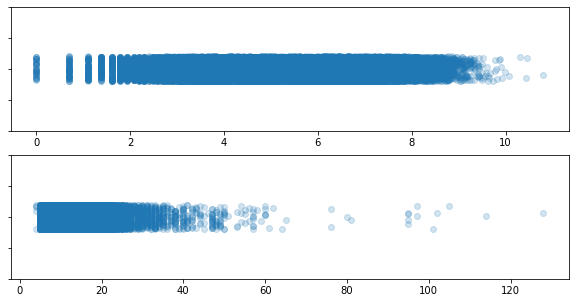

In [59]:
fig, axs = plt.subplots(2, figsize=(10,5))

one_dim_scatterplot(np.log(df.scaled_views), axs[0], alpha=0.2)
one_dim_scatterplot(df.tag_count, axs[1], alpha=0.2)

Text(0.5, 1.0, 'Distribution of Views')

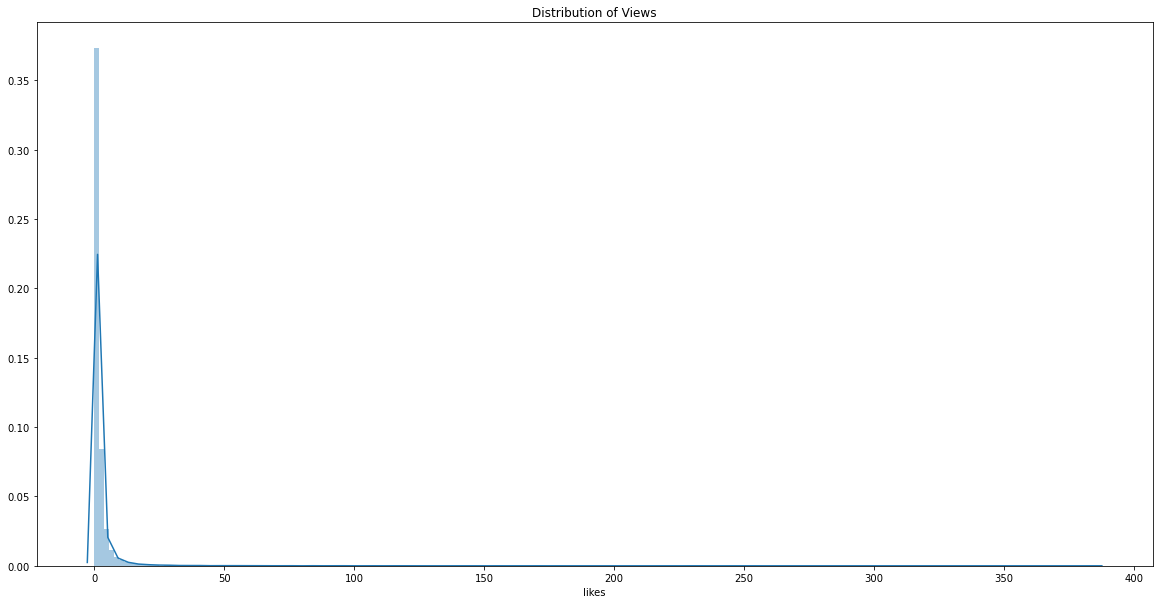

In [134]:
fig, ax = plt.subplots(figsize=(20,10));

sns.distplot(df[df['gt10'] == True].likes, bins=200, kde=True)

ax.set_title("Distribution of Views")

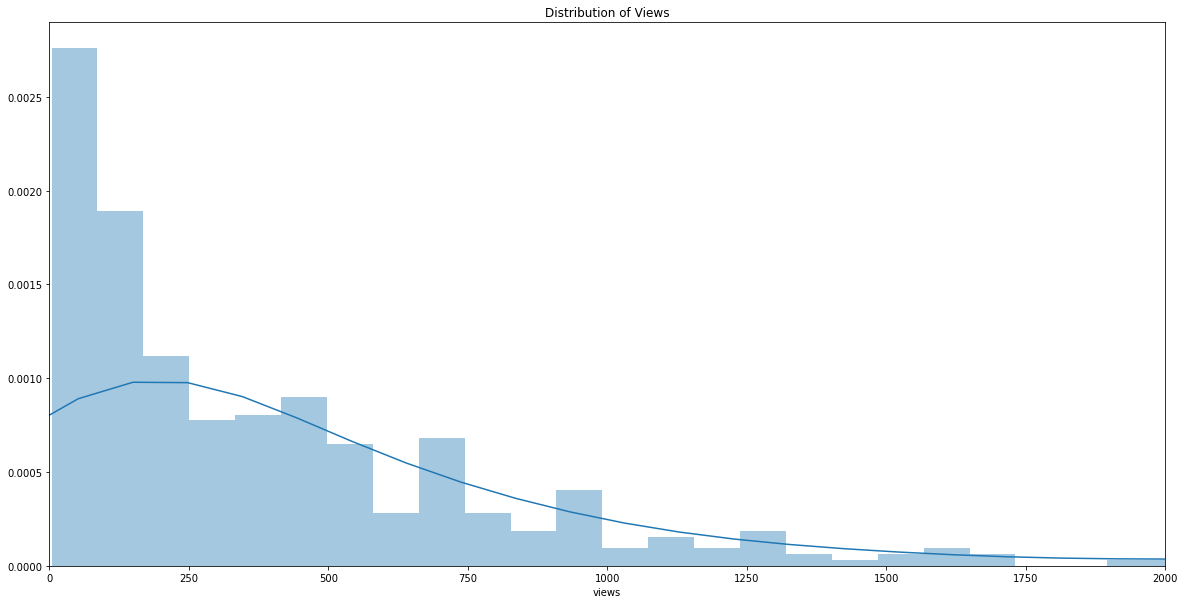

In [129]:
fig, ax = plt.subplots(figsize=(20,10));

sns.distplot(df[df['gt5'] == False].views, bins=100, kde=True)

ax.set_title("Distribution of Views")
ax.set_xlim(0, 2000);

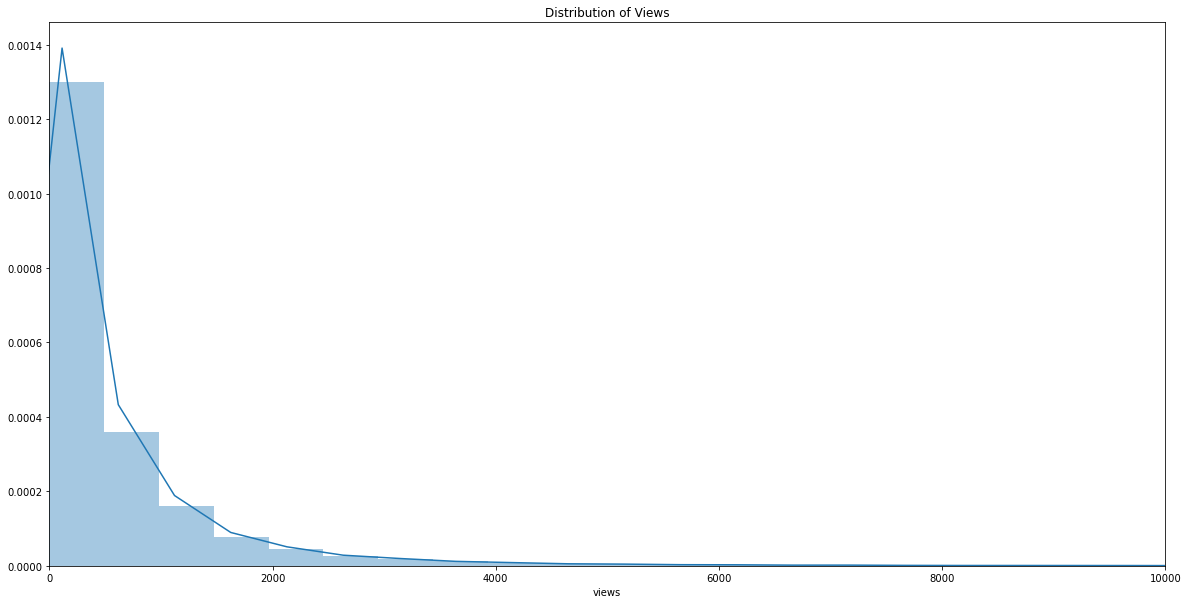

In [39]:
fig, ax = plt.subplots(figsize=(20,10));

sns.distplot(df.views, bins=100, kde=True)

ax.set_title("Distribution of Views")
ax.set_xlim(0, 10000);

(array([1.000e+00, 2.000e+00, 4.000e+00, 1.200e+01, 1.500e+01, 3.600e+01,
        9.200e+01, 1.850e+02, 3.210e+02, 6.160e+02, 9.410e+02, 1.519e+03,
        2.303e+03, 3.241e+03, 4.232e+03, 5.309e+03, 6.419e+03, 7.300e+03,
        7.684e+03, 8.240e+03, 8.030e+03, 7.627e+03, 7.040e+03, 6.310e+03,
        5.379e+03, 4.283e+03, 3.455e+03, 2.553e+03, 2.059e+03, 1.502e+03,
        1.013e+03, 8.010e+02, 5.200e+02, 3.320e+02, 2.280e+02, 1.520e+02,
        8.400e+01, 7.100e+01, 4.400e+01, 2.000e+01, 1.000e+01, 2.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([481.92   , 488.92616, 495.93232, 502.93848, 509.94464, 516.9508 ,
        523.95696, 530.96312, 537.96928, 544.97544, 551.9816 , 558.98776,
        565.99392, 573.00008, 580.00624, 587.0124 , 594.01856, 601.02472,
        608.03088, 615.03704, 622.0432 , 629.04936, 636.05552, 643.06168,
        650.06784, 657.074  , 664.08016, 671.08632, 678.09248, 685.09864,
      

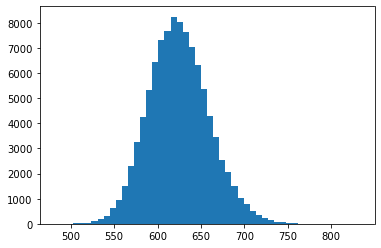

In [80]:
means = []
for _ in range(10**5):
    means.append(np.mean(df.views.sample(n=100)))
    
plt.hist(means, bins=50)

In [73]:
(df.tag_count <= 5)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: tag_count, Length: 46000, dtype: bool

In [66]:
df.loc[(df.tag_count > 5).index, 'gt5'] = True
df.loc[(df.tag_count <= 5).index, 'gt5'] = False

In [71]:
df.gt5

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: gt5, Length: 46000, dtype: object

In [70]:
df.gt5.value_counts()

False    46000
Name: gt5, dtype: int64

In [69]:
df.where(df.gt5 == True)['views'].mean()

nan

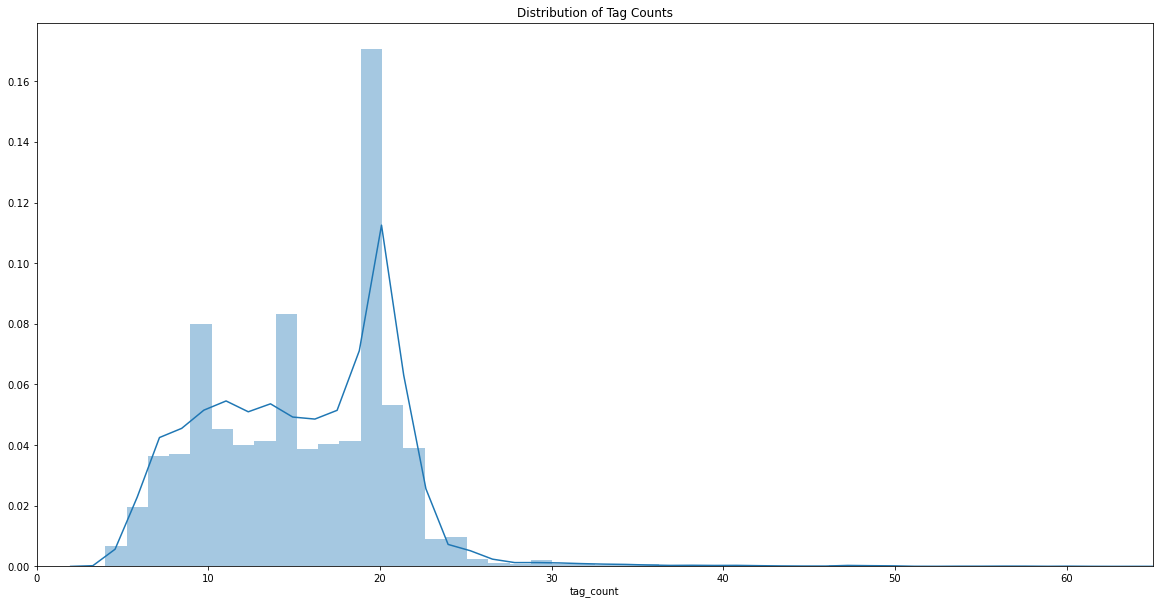

In [24]:
fig, ax = plt.subplots(figsize=(20,10));

sns.distplot(df.tag_count, bins=100)

ax.set_title("Distribution of Tag Counts")
ax.set_xlim(0, 65);

In [9]:
df.corr()

,views,likes,review_count,pic_count,price_usd
views,1.000000,0.516910,0.469539,0.059605,0.065457
likes,0.516910,1.000000,0.589192,0.118739,0.037523
review_count,0.469539,0.589192,1.000000,0.044165,0.003605
pic_count,0.059605,0.118739,0.044165,1.000000,0.077231
price_usd,0.065457,0.037523,0.003605,0.077231,1.000000


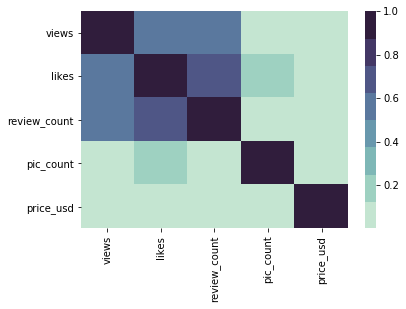

In [165]:
sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(8, start=.5, rot=-.55))

In [205]:
df['tag_count'] = df['tags'].agg(len)

In [208]:
mean_price_by_num_tags = df.groupby('tag_count').agg(np.mean)['price_usd']

In [236]:
df['tag_quantiles'] = pd.cut(df['tag_count'], df['tag_count'].quantile(np.linspace(0, 1, 10)))

In [237]:
mean_price_by_tag_quantiles = df.groupby('tag_quantiles').agg(np.mean)['price_usd']

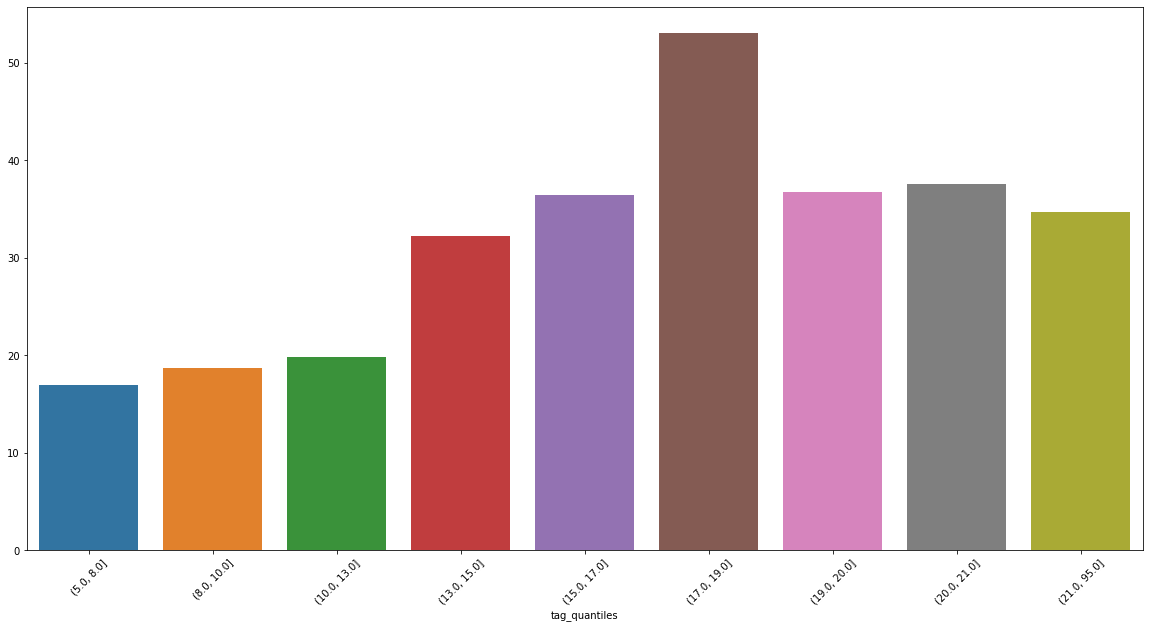

In [239]:
fig, ax = plt.subplots(figsize=(20,10))

#num_tags_mean_price = num_tags_mean_price.sort_values(ascending=False)

sns.barplot(mean_price_by_tag_quantiles.index, mean_price_by_tag_quantiles.values)
ax.set_xticklabels(mean_price_by_tag_quantiles.index, rotation=45);

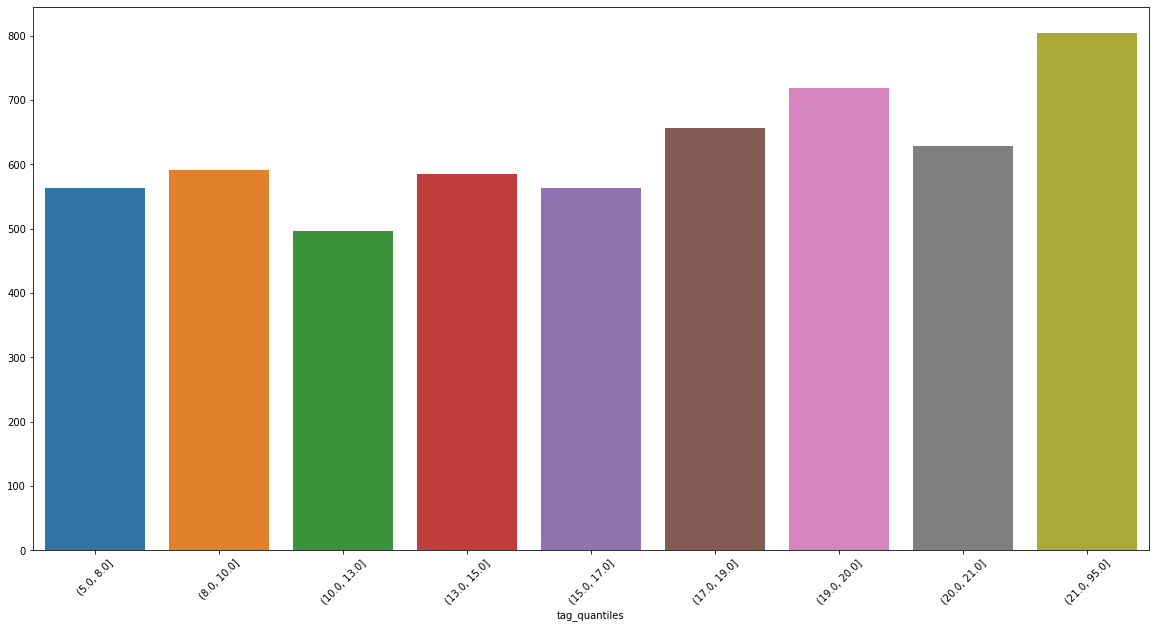

In [240]:
fig, ax = plt.subplots(figsize=(20,10))

mean_views_by_tag_quantiles = df.groupby('tag_quantiles').agg(np.mean)['views']

sns.barplot(mean_views_by_tag_quantiles.index, mean_views_by_tag_quantiles.values)
ax.set_xticklabels(mean_views_by_tag_quantiles.index, rotation=45);

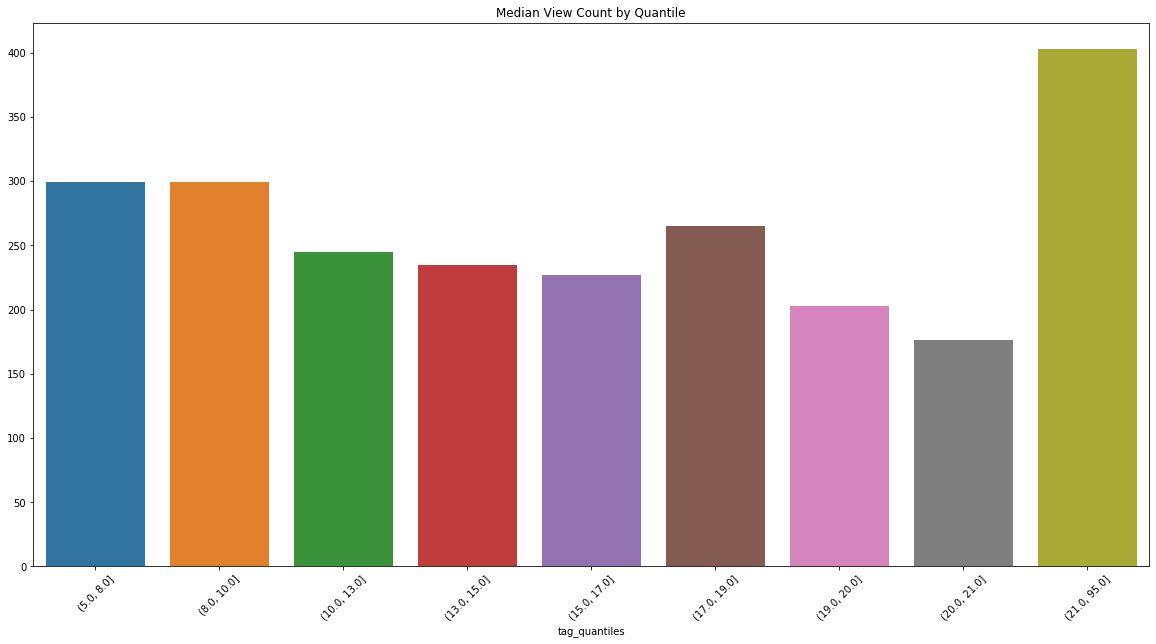

In [244]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title('Median View Count by Quantile')

median_views_by_tag_quantiles = df.groupby('tag_quantiles').agg(np.median)['views']

sns.barplot(median_views_by_tag_quantiles.index, median_views_by_tag_quantiles.values)
ax.set_xticklabels(median_views_by_tag_quantiles.index, rotation=45);

In [213]:
df[df['tag_count'] >= ]

,modeler,modeler_response,modeler_ratings,tags,views,likes,review_count,comments,price,pic_count,model_description,model_details,price_usd,tag_bins,tag_count
654,frederictabary,"{'percent': 33, 'time': '48.0h'}","{'avg_rating': 3.1, 'num_rating': 37}","[after, bed, agence, 3d, frédéric, tabary, bed...",547,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$9.80,5,This 3D model was originally created with Sket...,"{'model_id': '186174', 'geometry': '- ', 'poly...",9.80,"(23.0, 27.5]",27
407,fabelar,"{'percent': 96, 'time': '0.3h'}","{'avg_rating': 4.9, 'num_rating': 82}","[design, seat, relax, rest, standard, material...",925,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$15.00,7,3D office chair. Vray materials and textures i...,"{'model_id': '21916', 'geometry': 'Subdivision...",15.00,"(23.0, 27.5]",27
427,Preto3d,"{'percent': 13, 'time': '48.0h'}","{'avg_rating': 5.0, 'num_rating': 3}","[office, skyscraper, traffic, tree, metro, urb...",674,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$35.00,1,3D model of a modern building.Take a look at t...,"{'model_id': '113054', 'geometry': 'Polygon me...",35.00,"(23.0, 27.5]",27
921,firdz3d,"{'percent': 83, 'time': '3.4h'}","{'avg_rating': 3.7, 'num_rating': 79}","[bulb, incandescent, lamp, lighting, globe, el...",1770,1,0,"{'authors': [], 'texts': [], 'datetimes': []}",$9.00,6,LIGHT BULB=========================- Modeled i...,"{'model_id': '60479', 'geometry': 'Polygon mes...",9.00,"(23.0, 27.5]",27
302,hum3d,"{'percent': 27, 'time': '48.0h'}","{'avg_rating': 4.7, 'num_rating': 133}","[ashley, furniture, shay, bedroom, set, bulb, ...",905,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$29.00,3,Ashley Shay Table Lamp - 3D model.This model i...,"{'model_id': '26545', 'geometry': 'Polygon mes...",29.00,"(23.0, 27.5]",27
553,fabelar,"{'percent': 96, 'time': '0.3h'}","{'avg_rating': 4.9, 'num_rating': 82}","[stadium, arena, soccer, sport, field, buildin...",1070,3,0,"{'authors': [], 'texts': [], 'datetimes': []}",$79.00,15,"Stadium level 2 lowpoly 3D model. Vray, scanli...","{'model_id': '98914', 'geometry': 'Polygon mes...",79.00,"(23.0, 27.5]",27
868,fabelar,"{'percent': 96, 'time': '0.3h'}","{'avg_rating': 4.9, 'num_rating': 82}","[audi, s 1, sportback, car, concept, prototype...",1160,1,0,"{'authors': [], 'texts': [], 'datetimes': []}",$65.00,12,"Audi S1 Sportback rigged 3D model, Standard ma...","{'model_id': '71779', 'geometry': 'Subdivision...",65.00,"(23.0, 27.5]",27
936,Preto3d,"{'percent': 13, 'time': '48.0h'}","{'avg_rating': 5.0, 'num_rating': 3}","[office, skyscraper, traffic, tree, metro, urb...",553,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$35.00,1,3D model of a modern building.Take a look at t...,"{'model_id': '113939', 'geometry': 'Polygon me...",35.00,"(23.0, 27.5]",27
123,StepanProkop,"{'percent': 64, 'time': '7.1h'}","{'avg_rating': 4.4, 'num_rating': 25}","[alco, emd, sd 7, intercity, express, track, t...",1850,2,0,"{'authors': [], 'texts': [], 'datetimes': []}",$49.00,4,"lowpoly train with the low polygon count, but ...","{'model_id': '22703', 'geometry': 'Polygon mes...",49.00,"(23.0, 27.5]",27
303,Polygonal-Miniatures,"{'percent': 95, 'time': '0.3h'}","{'avg_rating': 5.0, 'num_rating': 550}","[clothing, female, girl, woman, fashion, virtu...",944,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$19.95,5,Photorealistic ModelNormal & Texture map avail...,"{'model_id': '239840', 'geometry': 'Polygon me...",19.95,"(23.0, 27.5]",27


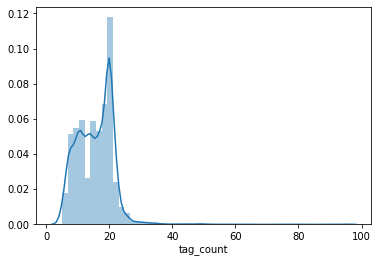

In [211]:
sns.distplot(df['tag_count']);

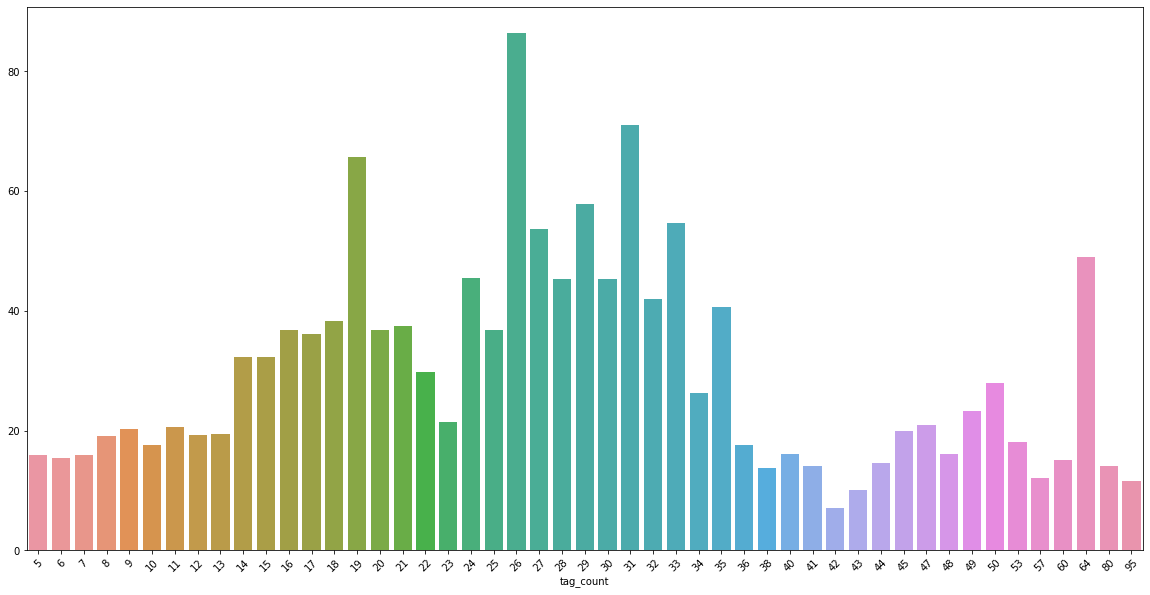

In [209]:
fig, ax = plt.subplots(figsize=(20,10))

#num_tags_mean_price = num_tags_mean_price.sort_values(ascending=False)

sns.barplot(mean_price_by_num_tags.index, mean_price_by_num_tags.values)
ax.set_xticklabels(mean_price_by_num_tags.index, rotation=45);

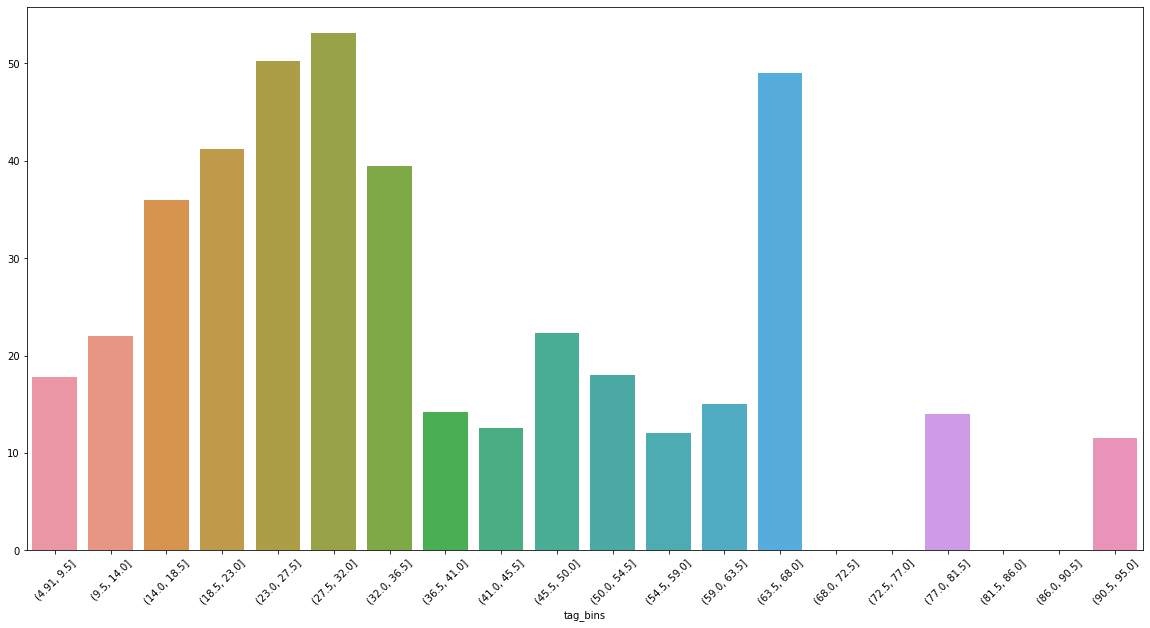

In [201]:
df['tag_bins'] = pd.cut(df['tags'].agg(len), bins=20)

num_tags_mean_price = df.groupby('tag_bins').mean()['price_usd']

fig, ax = plt.subplots(figsize=(20,10))

#num_tags_mean_price = num_tags_mean_price.sort_values(ascending=False)

sns.barplot(num_tags_mean_price.index, num_tags_mean_price.values)
ax.set_xticklabels(num_tags_mean_price.index, rotation=45);

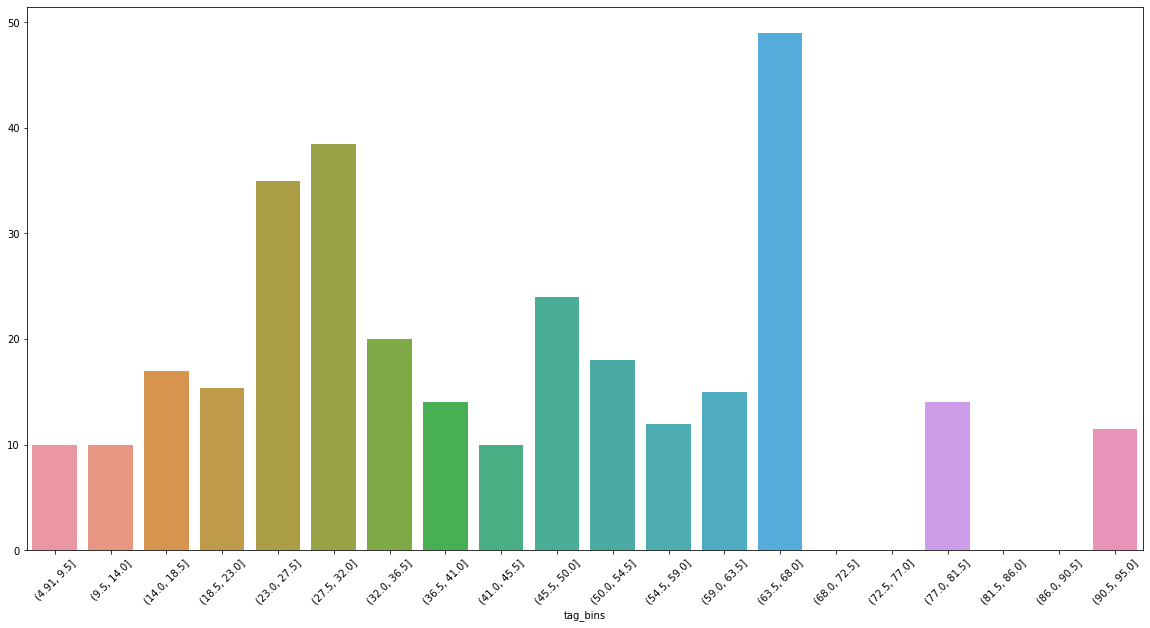

In [202]:
num_tags_median_price = df.groupby('tag_bins').median()['price_usd']

fig, ax = plt.subplots(figsize=(20,10))

#num_tags_median_price = num_tags_median_price.sort_values(ascending=False)

sns.barplot(num_tags_median_price.index, num_tags_median_price.values)
ax.set_xticklabels(num_tags_median_price.index, rotation=45);

In [100]:
groupby = df.groupby('modeler').count()

In [106]:
groupby['views'].values

array([ 1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  3,  1,  2,  4,  4,  3,  2,  1,  2,  1,  3,  1,  1,  1,  3,  1,
        4,  1,  1,  2,  1,  1,  1,  1,  1,  2,  6,  2,  2,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  3, 34,
        1,  1,  3, 24,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  7,  1,  1,
        1,  1,  1,  1,  1,  4,  1,  1,  4,  1,  1,  1, 13,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  7,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1

In [107]:
np.quantile(groupby['views'].values, q=[0.25, 0.75])

array([1., 1.])

In [81]:
df['num_models'] = pd.cut(groupby.count()['tags'], bins=4)

In [82]:
df['num_models']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: num_models, Length: 1000, dtype: category
Categories (4, interval[float64]): [(0.967, 9.25] < (9.25, 17.5] < (17.5, 25.75] < (25.75, 34.0]]

In [68]:
df.groupby('tag_bins').mean()

,views,likes,review_count,pic_count,num_tags
tag_bins,,,,,
"(4.91, 9.5]",534.754601,0.926380,0.067485,5.766871,7.447853
"(9.5, 14.0]",496.545455,1.138340,0.067194,8.249012,12.134387
"(14.0, 18.5]",461.182692,1.500000,0.067308,11.822115,16.543269
"(18.5, 23.0]",654.211594,2.031884,0.144928,12.382609,20.350725
"(23.0, 27.5]",1168.250000,0.600000,0.050000,5.900000,25.300000
"(27.5, 32.0]",2225.000000,1.285714,0.000000,7.714286,30.571429
"(32.0, 36.5]",NaN,NaN,NaN,NaN,NaN
"(36.5, 41.0]",23.000000,1.000000,0.000000,6.000000,40.000000
"(41.0, 45.5]",NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn import preprocessing

x, y = df.views, df.price_usd

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler

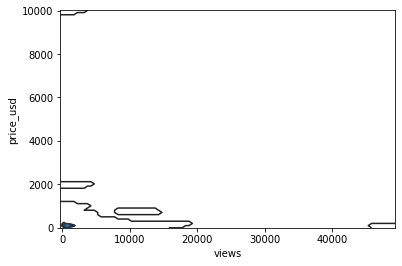

In [224]:
sns.kdeplot(df['views'], df['price_usd'])

In [ ]:
dist_df = df.loc[:, ['views']]

In [38]:
g = sns.FacetGrid(df, #the dataframe to pull from
                  row="hue", #define the column for each subplot row to be differentiated by
                  hue="hue", #define the column for each subplot color to be differentiated by
                  aspect=10, #aspect * height = width
                  height=1.5, #height of each subplot
                  palette=['#4285F4','#EA4335','#FBBC05','#34A853'] #google colors
                 )

KeyError: 'hue'

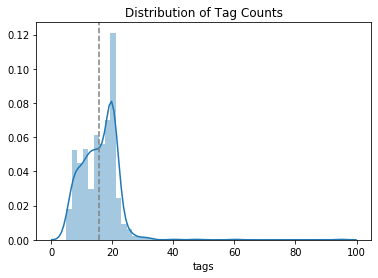

In [34]:
fig, ax = plt.subplots()

sns.distplot(df.tags.agg(len));

ax.set_title('Distribution of Tag Counts')
ax.axvline(np.mean(df.tags.agg(len)), color='gray', linestyle='--')


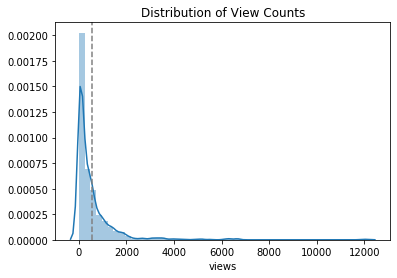

In [36]:
fig, ax = plt.subplots()

sns.distplot(df.views);

ax.set_title('Distribution of View Counts')
ax.axvline(np.mean(df.views), color='gray', linestyle='--');